In this data we will have to find whether the person is suffering from heart disease or not
since the target we will be predicting is categorical we will use classifiers and AUC ROC curve to predict the data

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('heartdisease.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Age explains age of patients in years

Sex column shows sex (1 = male; 0 = female)

cp shows chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
 
trestbps shows resting blood pressure (in mm Hg on admission to the hospital)

chol explains serum cholestoral levels in mg/dl

fbs expalins (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg shows resting electrocardiographic result
Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
Value 1: normal
Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach shows maximum heart rate achieved

exang shows exercise induced angina (1 = yes; 0 = no)

oldpeak explains ST depression induced by exercise relative to rest

slope shows the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping

ca is number of major vessels (0-3) colored by flourosopy

thal - A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

target tells wether patient has disease or not (1=yes, 0=no)

SOURCE:UCI


In [8]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we have no null or NaN data in any of our attributes

In [11]:
df.shape

(303, 14)

EDA

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


we can observe mean and median and found cholestrol,thalach(maximum heart rate achieved) have variations while other columns data is normally distributed
while comparing with 75% and max data distribution we can observe age,tresttbps(resting blood pressure),cholestrol,thalach(maximum heart rate achieved) and ca (major blood vessels) are the columns having variations while other attributes are normally distributed
in case of mean and standard deviation age,tresttbps(resting blood pressure),cholestrol,thalach(maximum heart rate achieved) has been dibursed while other data is normally distributed.



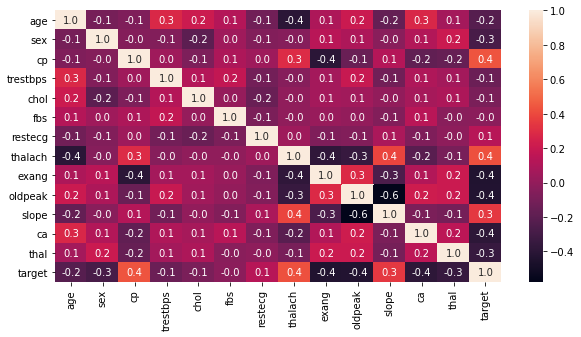

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

cp shows chest pain type which is 40% correlated with positive or negative heart disease
thalach shows maximum heart rate achieved is also having 40% correlated with positive or negative heart disease
slope of the peak exercise ST segment is 30% correlated with positive or negative heart disease

fasting blood sugar has no correlation

exercise induced angina is 40% negatively correlated with heart disease
oldpeak (ST depression induced by exercise relative to rest) is also 40% negatively correlated with heart disease
ca (major blood vessels) is also 40% negatively correlated with heart disease

VISUALISING THE DATA

In [14]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

we can observe their are 303 patients samples taken for prediction of which it is categorised as above
to make further analysis we should make a age category to understand which age category is more vulnerable to heart disease


In [15]:
minage=min(df.age)
maxage=max(df.age)
medianage=df.age.median()
print('Min age :',minage)
print('Max age :',maxage)
print('Median age :',medianage)

Min age : 29
Max age : 77
Median age : 55.0


in order to group by age we should have minimum, maximum and middlemost age hence made above analysis

Text(0.5, 1.0, 'Age of Heart Diseased Patients')

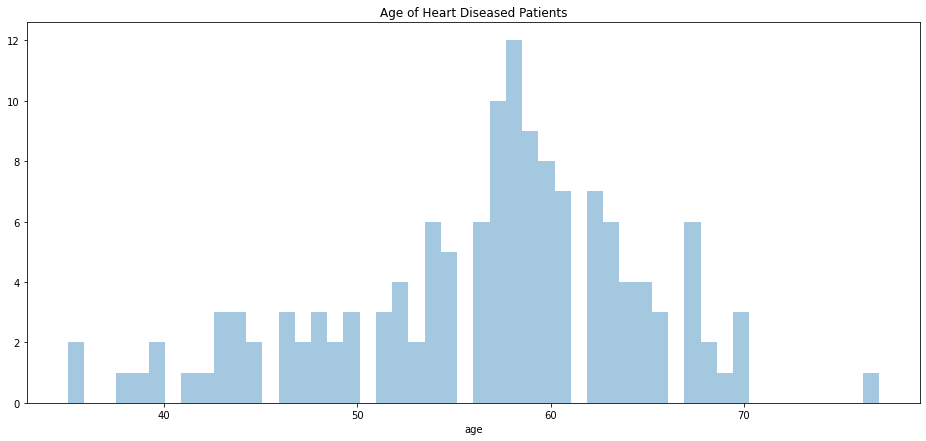

In [16]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients')

we can observe age between 55 to 60 their is more vulnerable to heart disease

In [17]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


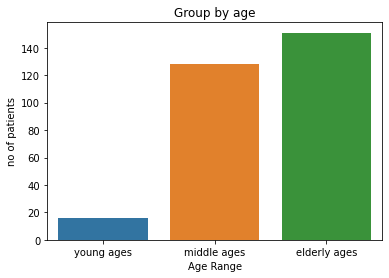

In [18]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('no of patients')
plt.title('Group by age')
plt.show()



we can understand elderly age are population is 151,highest compared to middle and young age which is 128 and 16

after understanding the effect of age category on heart disease we have divided age range between young, middle and elder age and categorised the same as 0,1 & 2 respectively

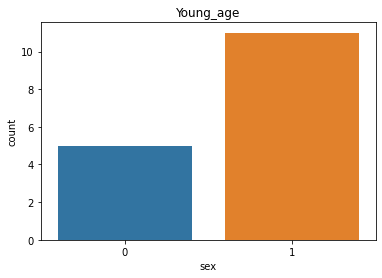

In [24]:
sns.countplot(young_ages.sex)
plt.title("Young_age")
plt.show()

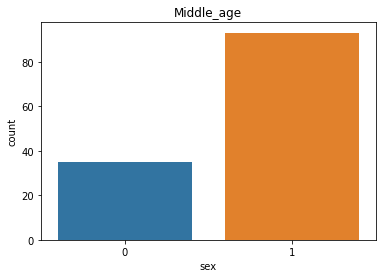

In [25]:
sns.countplot(middle_ages.sex)
plt.title("Middle_age")
plt.show()

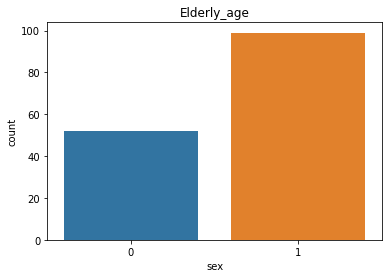

In [26]:
sns.countplot(elderly_ages.sex)
plt.title("Elderly_age")
plt.show()

In [27]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

we can understand total male population is high compared to female,while looking into categorical distribution it is evident in all categories male samples are high

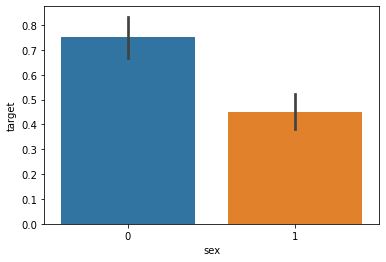

In [29]:

sns.barplot (x='sex',y='target',data=df)

we can observe data from male population is high in number which is 207 compared to female which is 96 in number

In [30]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

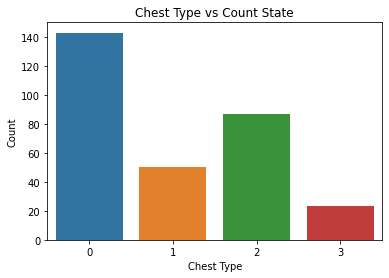

In [31]:
sns.countplot(df.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()

cp explains chest pain type where
-- Value 0: typical angina=showing highest cases 
-- Value 2: non-anginal pain shows second highest then follows Value 1: atypical angina and Value 3: asymptomatic


In [32]:
df.shape

(303, 15)

In [33]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart_Disease'
    else:
        return 'No Heart_Disease'
df2['target'] = df2['target'].apply(chng2)

from data we understood the we should analyse on different attributes,is their chances of getting Heart disease
another important thing to understand is, on these different attributes chances of male & female getting Heart disease 

Before making analyse from these two important attributes first lets analyse chances of male & female getting heart disease

Text(0.5, 1.0, 'Gender v/s target')

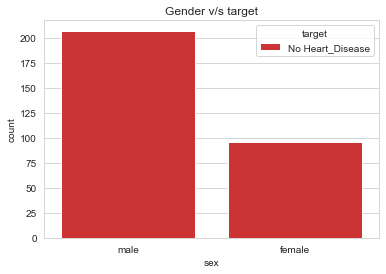

In [34]:
sns.set_style('whitegrid')
sns.set_palette('Set1')

df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target')


from the above chart we can understand male are more vulnerable to heart disease, which is more than 200 compared to female about to 100

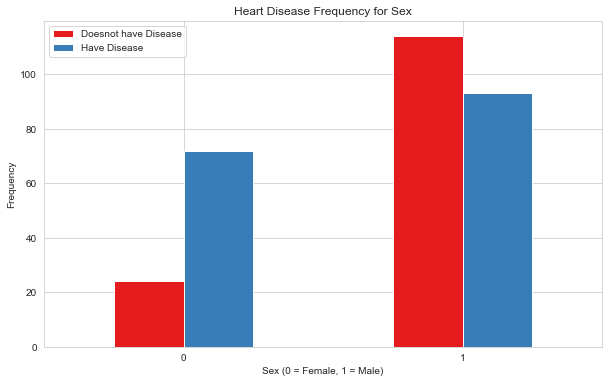

In [45]:

plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

#we can observe female have low chance of effecting due to heart disease compared to male and number of males having heart disease is also high in case male population

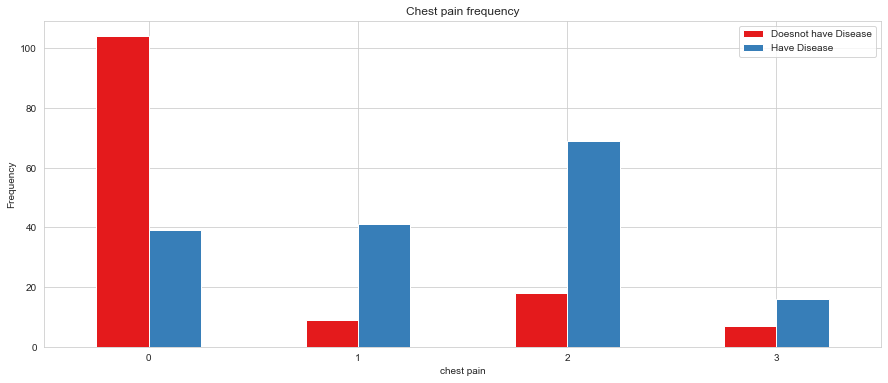

In [39]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Chest pain frequency')
plt.xlabel('chest pain')
plt.xticks(rotation=0)
plt.legend(["Doesnot have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

cp shows chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
we can observe in typical angina type of chest pain is more among people with no heart disease which is more than 100 in number compared to people having this type of chest pain with heart disease is around 40
while people with heart disease should be causious about atypical angina,non-anginal pain,asymptomatic type of pain as we see this type chest pain more among people with heart disease

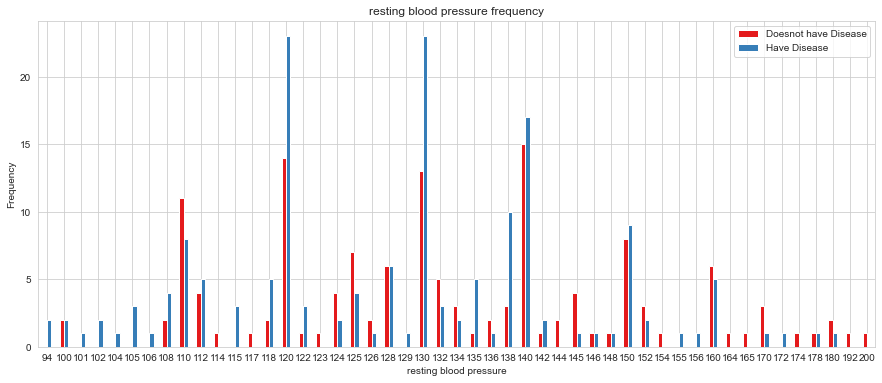

In [41]:
pd.crosstab(df.trestbps,df.target).plot(kind="bar",figsize=(15,6))
plt.title('resting blood pressure frequency')
plt.xlabel('resting blood pressure')
plt.xticks(rotation=0)
plt.legend(["Doesnot have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

from the above analysis we can understand about resting blood pressure and its relation with heart disease
blood pressure raninging 94 to 106 have chances of heart disease
in case of resting blood pressure with 120,130 & 140 their high chance of having disease freguency of occurance 23,23 & 18 respectively


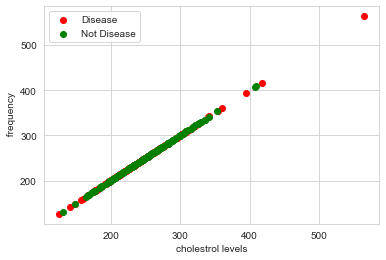

In [44]:
plt.scatter(x=df.chol[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.chol[df.target==0], y=df.chol[(df.target==0)],c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("cholestrol levels")
plt.ylabel(" frequency")
plt.show()

From the above analysis we can observe cholestrol levels between 150 to 350 has no heart disease,above 350 cholestrol level, their be can chances of effecting with heart disease and we find mixed population between 100 to 150 cholestrol levels

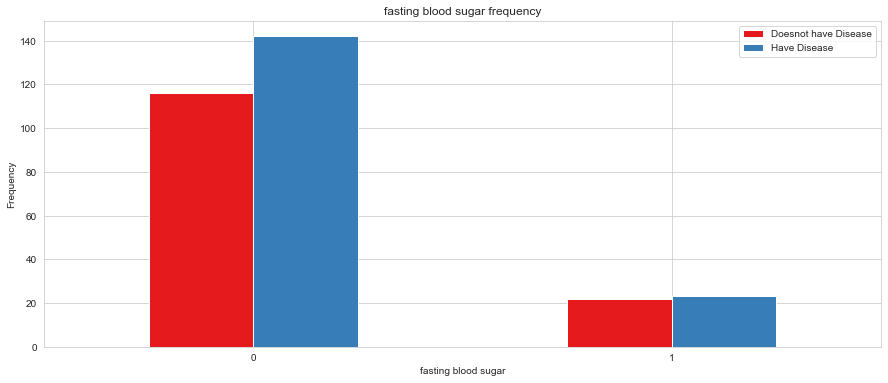

In [46]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title('fasting blood sugar frequency')
plt.xlabel('fasting blood sugar')
plt.xticks(rotation=0)
plt.legend(["Doesnot have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

fbs expalins (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
we can understand population with fasting blood pressure is more 
with the analysis we found people without fasting blood sugar are having high chances of heart disease

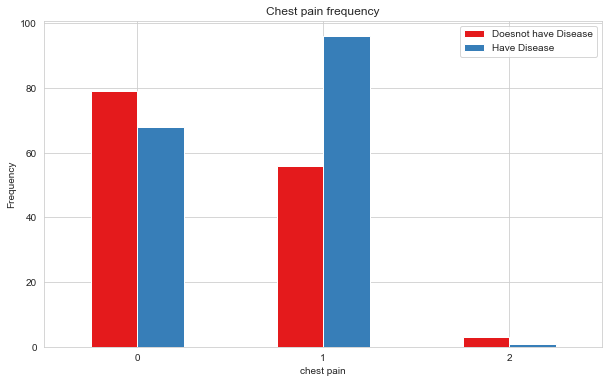

In [48]:
pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(10,6))
plt.title('Chest pain frequency')
plt.xlabel('chest pain')
plt.xticks(rotation=0)
plt.legend(["Doesnot have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

restecg shows resting electrocardiographic result
type 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
type 1: normal
type 2: having ST-T wave abnormality
type 1 kind of electrocardiographic result has high chances of heart disease of ariund 90 
while in case of type 0 kind of electrocardiographic result we find more number of people with no heart disease category
and skeptical in case of type 2


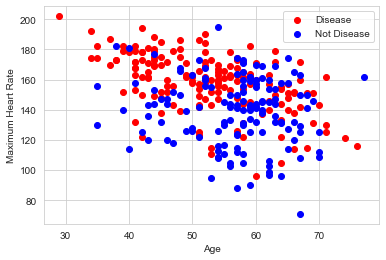

In [51]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c="blue")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

we can observe between age of 35 to 55 maximum heart rate their are people with more heart disease and maximum heart rate between 55 to 65 their is no heart disease

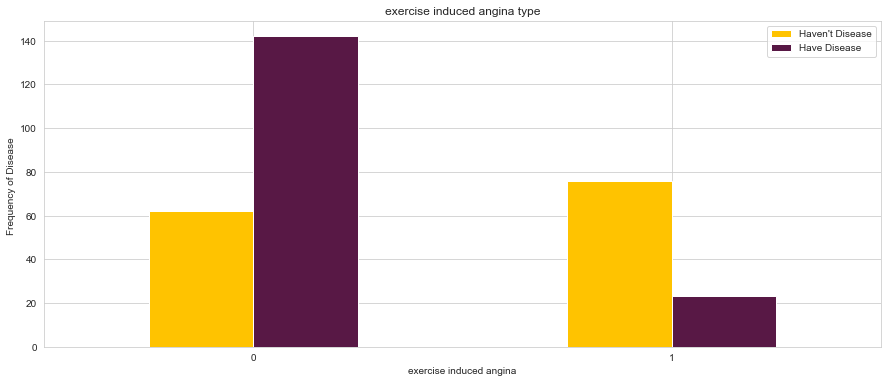

In [52]:
pd.crosstab(df.exang,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('exercise induced angina type')
plt.xlabel('exercise induced angina')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease ')
plt.show()

exang shows exercise induced angina (1 = yes; 0 = no)
we can observe people with positive exercise induced angina has high chances of being effected with heart disease

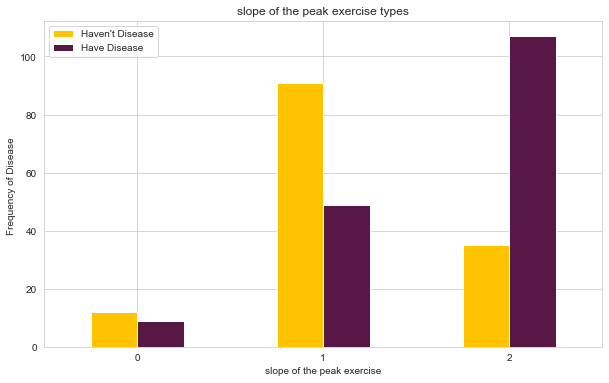

In [55]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(10,6),color=['#FFC300','#581845' ])
plt.title('slope of the peak exercise types')
plt.xlabel('slope of the peak exercise')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease ')
plt.show()

slope column shows the slope of the peak exercise ST segment
0: downsloping;
1: flat; 
2: upsloping;
from the above data we can understand people with type 2  peak exercise ST segment should be more cautious as they are vulnearable to heart diseae

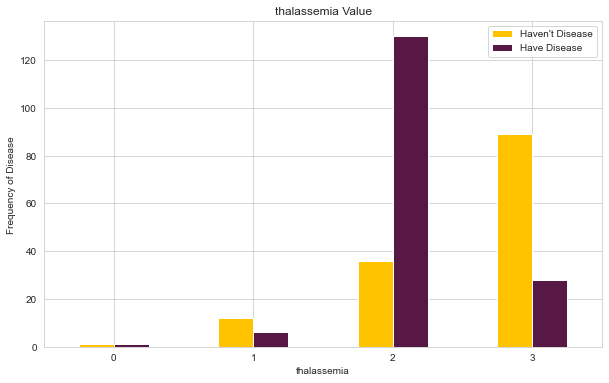

In [56]:
pd.crosstab(df.thal,df.target).plot(kind="bar",figsize=(10,6),color=['#FFC300','#581845' ])
plt.title('thalassemia Value')
plt.xlabel('thalassemia')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease ')
plt.show()

thal column explains A blood disorder called thalassemia 
Value 0: NULL
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
    
thalassemia with value2 varient category are the people with high chances of heart disease

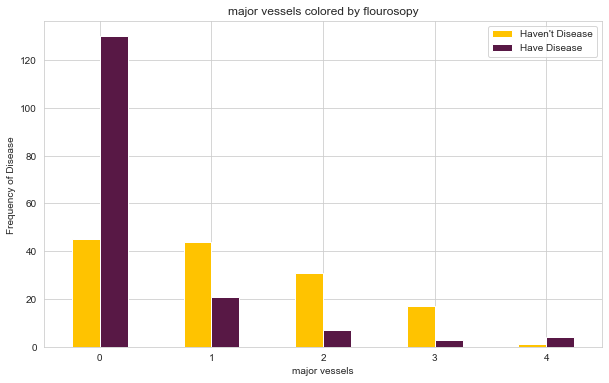

In [58]:
pd.crosstab(df.ca,df.target).plot(kind="bar",figsize=(10,6),color=['#FFC300','#581845' ])
plt.title('major vessels colored by flourosopy')
plt.xlabel('major vessels')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease ')
plt.show()

ca column explains number of major vessels (0-3) colored by flourosopy
here major vessels with 0 colored has more chances of getting effected by heart disease


In [40]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'AgeRange'],
      dtype='object')

DATA PROCESSING

In [61]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [62]:
#scaling process

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
columns_to_scale=['age','trestbps','thalach','oldpeak']
dataset[columns_to_scale]=standardscaler.fit_transform(dataset[columns_to_scale])

In [66]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,AgeRange,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,233,0.015443,1.087338,1,2,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,250,1.633471,2.122573,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,204,0.977514,0.310912,1,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,236,1.239897,-0.206705,1,2,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,354,0.583939,-0.379244,1,2,1,0,1,...,1,1,0,0,0,0,0,0,1,0


In [67]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)

CLASSIFICATION

In [108]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import warnings
warnings.filterwarnings('ignore')

KNeighborsClassifier

In [109]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range (1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())


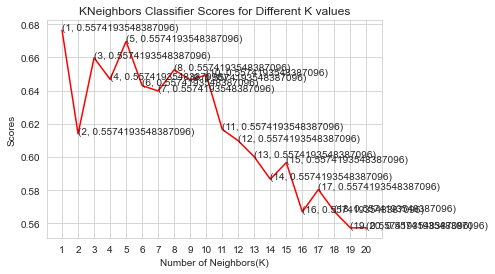

In [110]:
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range (1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[-1]))
    plt.xticks([i for i in range(1,21)])
    plt.xlabel('Number of Neighbors(K)')
    plt.ylabel('Scores')
    plt.title('KNeighbors Classifier Scores for Different K values')


In [111]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [112]:
score

array([0.67741935, 0.77419355, 0.61290323, 0.66666667, 0.63333333,
       0.5       , 0.63333333, 0.56666667, 0.53333333, 0.5       ])

In [113]:
score.mean()

0.6097849462365591

DecisionTreeClassifier

In [114]:
dt_scores=[]
for d in range(1,21):
    dt_classifier=DecisionTreeClassifier()
    score=cross_val_score(dt_classifier,x,y,cv=10)
    dt_scores.append(score.mean())

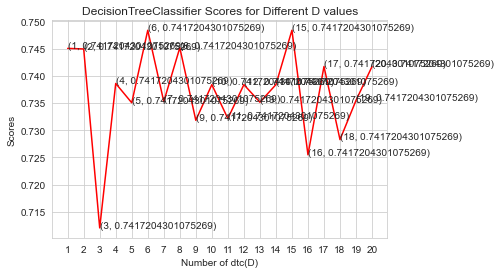

In [115]:
plt.plot([d for d in range(1,21)],dt_scores,color='red')
for i in range (1,21):
    plt.text(i,dt_scores[i-1],(i,dt_scores[-1]))
    plt.xticks([i for i in range(1,21)])
    plt.xlabel('Number of dtc(D)')
    plt.ylabel('Scores')
    plt.title('DecisionTreeClassifier Scores for Different D values')


In [116]:
dt_classifier=DecisionTreeClassifier()
score=cross_val_score(dt_classifier,x,y,cv=10)

In [117]:
score

array([0.87096774, 0.77419355, 0.87096774, 0.8       , 0.73333333,
       0.66666667, 0.56666667, 0.83333333, 0.6       , 0.73333333])

In [118]:
score.mean()

0.7449462365591397

LogisticRegression

In [119]:
lr_scores=[]
for l in range(1,21):
    lr_classifier=LogisticRegression()
    score=cross_val_score(lr_classifier,x,y,cv=10)
    lr_scores.append(score.mean())


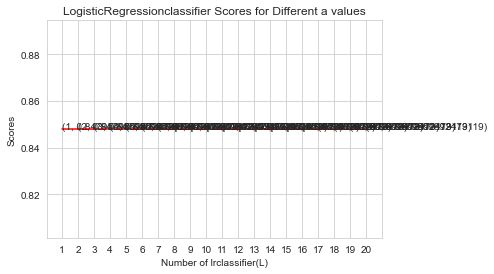

In [124]:
plt.plot([l for l in range(1,21)],lr_scores,color='red')
for a in range (1,21):
    plt.text(a,lr_scores[i-1],(a,lr_scores[-1]))
    plt.xticks([a for a in range(1,21)])
    plt.xlabel('Number of lrclassifier(L)')
    plt.ylabel('Scores')
    plt.title('LogisticRegressionclassifier Scores for Different a values')

In [121]:
lr_classifier=LogisticRegression()
score=cross_val_score(lr_classifier,x,y,cv=10)

In [122]:
score

array([0.87096774, 0.90322581, 0.83870968, 0.96666667, 0.86666667,
       0.8       , 0.83333333, 0.86666667, 0.76666667, 0.76666667])

In [123]:
score.mean()

0.8479569892473119

GaussianNB

In [126]:
gnb_scores=[]
for g in range(1,21):
    gnb_classifier=GaussianNB()
    score=cross_val_score(gnb_classifier,x,y,cv=10)
    gnb_scores.append(score.mean())

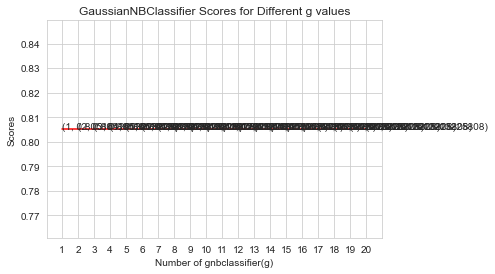

In [127]:
plt.plot([g for g in range(1,21)],gnb_scores,color='red')
for g in range (1,21):
    plt.text(g,gnb_scores[i-1],(g,gnb_scores[-1]))
    plt.xticks([g for g in range(1,21)])
    plt.xlabel('Number of gnbclassifier(g)')
    plt.ylabel('Scores')
    plt.title('GaussianNBClassifier Scores for Different g values')

In [128]:
gnb_classifier=GaussianNB()
score=cross_val_score(gnb_classifier,x,y,cv=10)

In [129]:
score

array([0.83870968, 0.77419355, 0.83870968, 0.86666667, 0.83333333,
       0.8       , 0.73333333, 0.9       , 0.66666667, 0.8       ])

In [131]:
score.mean()

0.8051612903225808

SVC

In [134]:
svc_scores=[]
for s in range(1,21):
    svc_classifier=SVC()
    score=cross_val_score(svc_classifier,x,y,cv=10)
    svc_scores.append(score.mean())

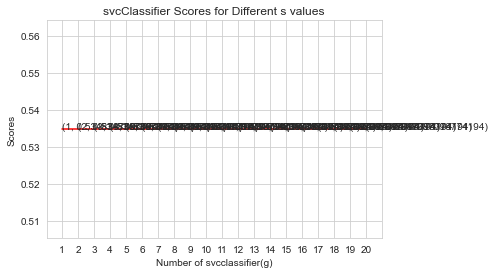

In [141]:
plt.plot([s for s in range(1,21)],svc_scores,color='red')
for s in range (1,21):
    plt.text(s,svc_scores[s-1],(s,svc_scores[-1]))
    plt.xticks([s for s in range(1,21)])
    plt.xlabel('Number of svcclassifier(g)')
    plt.ylabel('Scores')
    plt.title('svcClassifier Scores for Different s values')

In [137]:
svc_classifier=SVC()
score=cross_val_score(svc_classifier,x,y,cv=10)

In [138]:
score

array([0.51612903, 0.5483871 , 0.48387097, 0.56666667, 0.56666667,
       0.53333333, 0.53333333, 0.53333333, 0.53333333, 0.53333333])

In [139]:
score.mean()

0.5348387096774194

AdaBoostClassifier

In [140]:
adb_scores=[]
for ad in range(1,21):
    adb_classifier=AdaBoostClassifier()
    score=cross_val_score(adb_classifier,x,y,cv=10)
    adb_scores.append(score.mean())

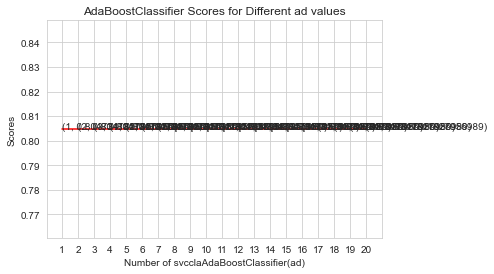

In [142]:
plt.plot([ad for ad in range(1,21)],adb_scores,color='red')
for ad in range (1,21):
    plt.text(ad,adb_scores[ad-1],(ad,adb_scores[-1]))
    plt.xticks([ad for ad in range(1,21)])
    plt.xlabel('Number of svcclaAdaBoostClassifier(ad)')
    plt.ylabel('Scores')
    plt.title('AdaBoostClassifier Scores for Different ad values')

In [143]:
adb_classifier=SVC()
score=cross_val_score(adb_classifier,x,y,cv=10)

In [144]:
score

array([0.51612903, 0.5483871 , 0.48387097, 0.56666667, 0.56666667,
       0.53333333, 0.53333333, 0.53333333, 0.53333333, 0.53333333])

In [145]:
score.mean()

0.5348387096774194

LOGISTICREGRESSION

In [147]:
from sklearn.metrics import roc_curve, auc
lr=LogisticRegression()
lr.fit(x_train,y_train)
p=lr.predict(x_test)
print(accuracy_score(y_test,predlr))

0.8656716417910447


In [149]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.01323593, 0.47987593, 0.54949515, 0.00992487, 0.95849423,
       0.93335193, 0.57955866, 0.00217093, 0.0108093 , 0.51524863,
       0.49387589, 0.12157557, 0.9576792 , 0.04426161, 0.98951134,
       0.95443508, 0.98386793, 0.03497504, 0.00451261, 0.0082457 ,
       0.49315597, 0.06895508, 0.53308249, 0.77154311, 0.77761822,
       0.52623174, 0.92273873, 0.68211395, 0.01713727, 0.95786955,
       0.01768888, 0.01563312, 0.00694119, 0.16052193, 0.9152285 ,
       0.01994911, 0.83360906, 0.87193098, 0.65030376, 0.86766422,
       0.93382686, 0.85925059, 0.94574604, 0.71213181, 0.83409789,
       0.04647662, 0.38648077, 0.97715302, 0.01860774, 0.01103572,
       0.05715392, 0.01294575, 0.6911056 , 0.95428515, 0.09808838,
       0.00692093, 0.10724562, 0.97962343, 0.01530806, 0.00215769,
       0.05796219, 0.94073397, 0.12219568, 0.56130061, 0.91446933,
       0.06666848, 0.57096403])

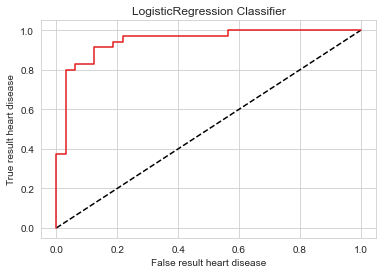

0.8660714285714286

In [153]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression()')
plt.xlabel('False result heart disease')
plt.ylabel('True result heart disease')
plt.title('LogisticRegression Classifier')
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

THE BEST MODEL IS LogisticRegressionClassifier
the maximum accuracy inthis model is 80 - 86.6%,we can derive more accuracy with higher data

SERIALIZATION

In [154]:
import pickle
filename='inhouse_Heartdisease.csv.pkl'

In [155]:
pickle.dump(lr,open(filename,'wb'))

CONCLUSION

In [157]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))

In [158]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [160]:
df_final

,original,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
62,0,0
63,0,1
64,1,1
65,0,0


From the above table the model is predicted the values with 80-86% accuracy